In [3]:

import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
#from wordcloud import WordCloud

In [4]:
df = pd.read_csv("Scaled-VAD.csv", index_col = 0)
df['Joy'] = df['Joy'].replace(0,'Non-Joy')
df['Joy'] = df['Joy'].replace(1,'Joy')

In [5]:
#These are tweets that did not have a valence or arousal score
# number of tweets like this: 1738
#removed these from data frame
print(len(df))
ex = df[(df['V'] == -1) & (df['A']==-1)]
#print(list(ex['Tweet']))
inx = ex.index
df = df.drop(inx)
print(len(df))
#df goes from 18226 tweets to 16488 tweets

18226
16488


In [6]:
#Just Joy Tweets: These are all joy tweets with only the valence and arousal scores
#9113 examples index from 0 to 9112
joy = df.where(df["Joy"] == "Joy")
joy = joy.dropna(axis=0)
joy = joy.reset_index()
joy = joy.drop(columns = ["D", "Joy", "index"])
#length joy tweets: 9098

#Non-Joy Tweets Only
nonjoy = df.where(df["Joy"] == "Non-Joy")
nonjoy = nonjoy.dropna(axis=0)
nonjoy = nonjoy.reset_index()
nonjoy = nonjoy.drop(columns = ["D", "Joy", "index"])
#length non-joy tweets: 7390

In [7]:
# List of valence/arousal 
va_ar = []
i = 0
while i < len(joy["V"]):
    va_ar.append([joy["V"][i], joy["A"][i]])
    i+=1
    
    
nva_ar = []
i = 0
while i < len(nonjoy["V"]):
    nva_ar.append([nonjoy["V"][i], nonjoy["A"][i]])
    i+=1

a = va_ar + nva_ar

In [8]:
vaar = pd.DataFrame(va_ar, columns = ["V", "A"])
corr = vaar.corr()
print()
print("Joy Tweet Correlation Valence vs. Arousal")
print(corr)

nvaar = pd.DataFrame(nva_ar, columns = ["V", "A"])
ncorr = nvaar.corr()
print()
print("Non-Joy Tweet Correlation Valence vs. Arousal")
print(ncorr)

al= pd.DataFrame(a, columns = ["V", "A"])
al_corr = al.corr()
print()
print("All Tweets Correlation Valence vs. Arousal")
print(al_corr)


Joy Tweet Correlation Valence vs. Arousal
          V         A
V  1.000000  0.799502
A  0.799502  1.000000

Non-Joy Tweet Correlation Valence vs. Arousal
          V         A
V  1.000000  0.619951
A  0.619951  1.000000

All Tweets Correlation Valence vs. Arousal
          V         A
V  1.000000  0.660327
A  0.660327  1.000000


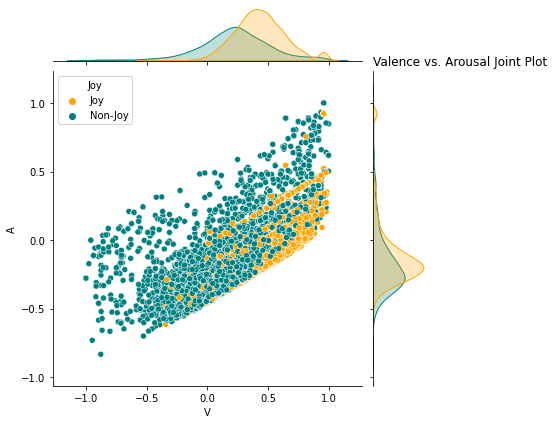

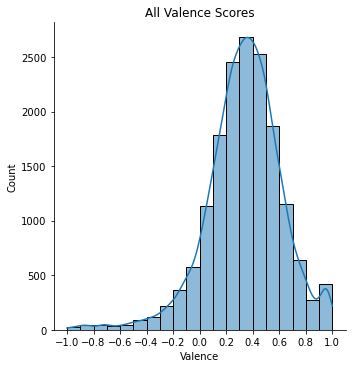

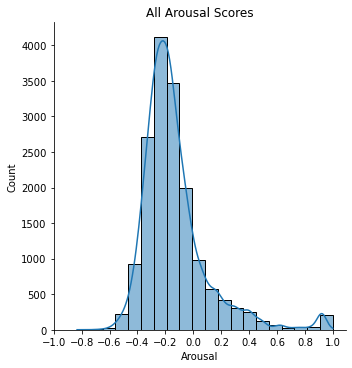

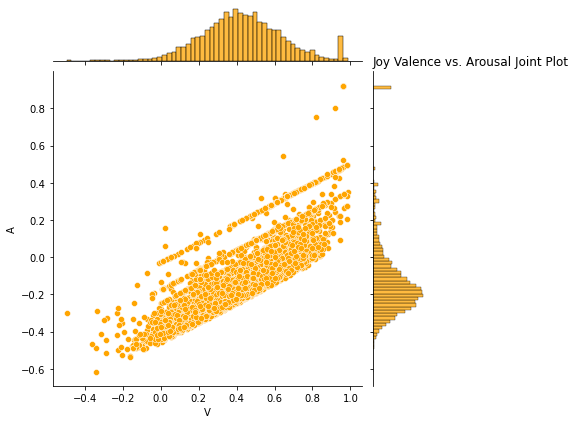

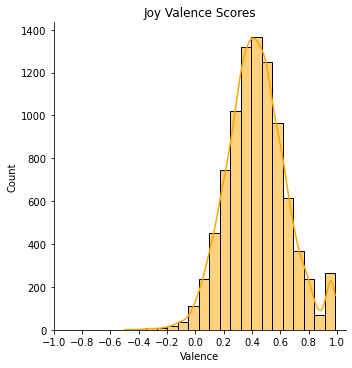

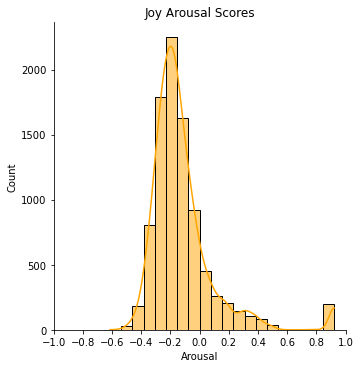

In [9]:
#Joint Plot from seaborn 
#Distribution plot



sns.jointplot(data=df, x="V", y="A", hue="Joy", palette = ["orange", "teal"]) #specify the hue
plt.title("Valence vs. Arousal Joint Plot", loc='left')
plt.xlabel("Valence")
plt.ylabel("Arousal")
plt.show()



sns.displot(df["V"], kde=True, bins=20)
plt.title("All Valence Scores")
plt.xlabel("Valence")
plt.xticks([-1, -.8, -.6, -.4, -.2, 0, .2, .4, .6, .8, 1])
plt.show()


sns.displot(df["A"], kde=True, bins=20)
plt.title("All Arousal Scores")
plt.xlabel("Arousal")
plt.xticks([-1, -.8, -.6, -.4, -.2, 0, .2, .4, .6, .8, 1])
plt.show()

sns.jointplot(data=joy, x="V", y="A", color = "orange")
plt.title("Joy Valence vs. Arousal Joint Plot", loc='left')
plt.xlabel("Valence")
plt.ylabel("Arousal")
plt.show()


sns.displot(joy["V"], kde=True, bins=20, color = "orange")
plt.title("Joy Valence Scores")
plt.xlabel("Valence")
plt.xticks([-1, -.8, -.6, -.4, -.2, 0, .2, .4, .6, .8, 1])
plt.show()

sns.displot(joy["A"], kde=True, bins=20, color = "orange")
plt.title("Joy Arousal Scores")
plt.xlabel("Arousal")
plt.xticks([-1, -.8, -.6, -.4, -.2, 0, .2, .4, .6, .8, 1])
plt.show()

In [10]:
#Valence/Arousal Averages Across Joy Tweets
avg_va = str(joy["V"].mean())
avg_ar = str(joy["A"].mean())
print("Averages Across Joy Tweets~ " + "Valence: " + avg_va + "; Arousal: "+  avg_ar)

#Valence/Arousal Averages Across Non-Joy Tweets
avg_va_nonjoy = str(nonjoy["V"].mean())
avg_ar_nonjoy = str(nonjoy["A"].mean())
print("Averages Across Non-Joy Tweets~ " + "Valence: " + avg_va_nonjoy + "; Arousal: "+  avg_ar_nonjoy)

Averages Across Joy Tweets~ Valence: 0.43165960016882277; Arousal: -0.12165806272575876
Averages Across Non-Joy Tweets~ Valence: 0.21696936427284466; Arousal: -0.15238244382228733


In [11]:
#Look into the three high outliers of Joy Tweets

#198 examples with valence and arousal above .9
joy_outliers = joy[(joy['V'] > .9) & (joy['A'] >.9)]
print(len(joy_outliers))
#print(list(joy_outliers['Tweet']))


##This is how the VAD lexicon data looks
# joy	0.980	0.824	0.794
# joyful	0.990	0.740	0.667
# joyous	0.958	0.580	0.728
# joyride	0.694	0.550	0.500
# joys	0.981	0.643

198


In [14]:
#Look into the negative valence & arousal joy tweets
#129 examples of joy tweets with both negative scores
negative_joy = joy[(joy['V'] < 0) & (joy['A'] <0)]
print(len(negative_joy))

#Interesting tweets in here!
print(list(negative_joy['Tweet']))

#What are the words before and after the word joy in each tweet? steal joy, spread joy, etc. 
l = []
before_after = {}
for tweet in negative_joy['Tweet']:
    res = tweet.split() 
    before_after = {}
    i = 0 
    while i <len(res):
        if res[i] == 'joy':
            try:
                before_after['before'] = res[i-2], res[i-1]
                before_after['after'] = res[i+1], res[i+2]
                #print(before_after)
                l.append(before_after)
            except:
                print(res)
        i+=1
         

129
['sdellag p00fter justjake1994 poplockedropit jamesmasonfox jamesholod kennybenj ’ follow people spout negativity time mute intentionally unintentionally make anxious angry annoyed twitter bring joy', 'mysterewoodz suburban teenage emo side screaming joy', 'msmmmj chrislongview mariaso1200 pelosisquadfive hopeformaybe novusdivus bbowers73 flushednsticky veeceemurphy76 prezhillary17 nikkibirnks reginaa1981 dynosized sailorhaumea tify330 stephenhasideas sudarakaa airinonetime mzsailiante werisetogether cheryllynn512 rwcogito nkem hopey70 deardean22 bravelywriting ccotenj diogenesterp dianatremaine82 yoclockface sdgoblue wickedirishmn playfulimp anootchka cheersmom jennifro colleenholt20 bdavisauthor elizlipp ncshea leehillerlondon kh4potus sexygirl798 redhotnerd shortstop91 alasscanisback marylynne1 ceealtman labreagal mariebgee yesrachel made trumps corruption didnt cross line impeachment muchjoy reid went narrow focus', 'joyin watching atoilet overflow', 'nothing hurt world bad pla

In [13]:
b_a = pd.DataFrame(l)
print(b_a)
#it doesnt work for all negative tweets that don't have 2 words before & after joy, any other analysis ideas?

                   before               after
0        (hollow, knight)        (con, drift)
1        (beat, specials)  (division, pogues)
2        (anger, sadness)       (fear, guilt)
3   (shit, thejoythieves)     (thieves, kill)
4            (cry, tears)              (’, ’)
..                    ...                 ...
79     (canned, misnamed)      (dumb, racist)
80            (na, steal)           (wan, na)
81    (comparison, thief)         (stfu, pls)
82           (cry, tears)        (victory, ✨)
83        (qb, richgonna)   (watching, young)

[84 rows x 2 columns]
